In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\python\\salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
X = df.iloc[:,:-1]

In [5]:
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
Y = df['salary_more_then_100k']
Y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])
X


,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [10]:
X_n = X.drop(['company','job','degree'],axis='columns')
X_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [12]:
model.fit(X_n,Y)

DecisionTreeClassifier()

In [13]:
model.score(X_n,Y)

1.0

In [14]:
model.predict([[2,1,1]])

array([1], dtype=int64)

[Text(304.3636363636364, 498.3, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(152.1818181818182, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(76.0909090909091, 317.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(228.27272727272728, 317.1, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(152.1818181818182, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(304.3636363636364, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(456.54545454545456, 407.70000000000005, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(380.4545454545455, 317.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(532.6363636363636, 317.1, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(456.54545454545456, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(608.7272727272727, 226.5, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(532.6363636363636, 135.89999999999998, 'g

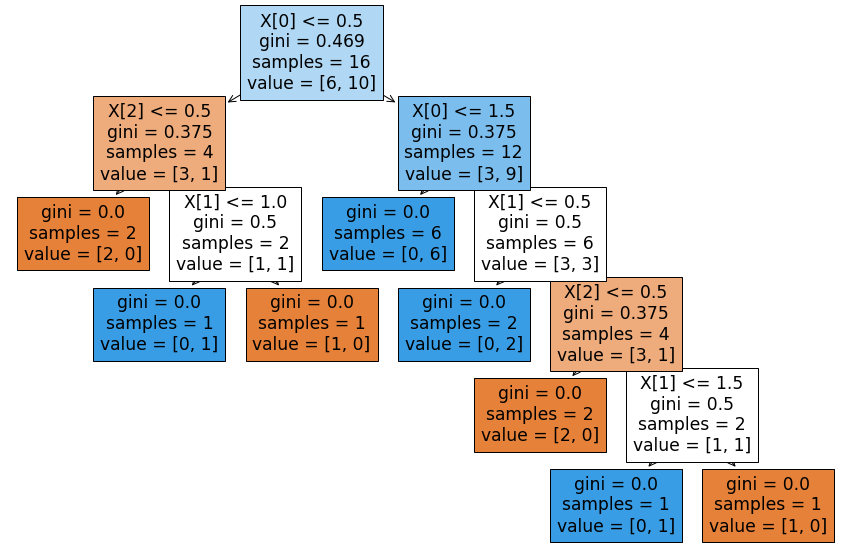

In [15]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)